In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
import time
from math import ceil

In [88]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [89]:
pd.set_option('display.max_columns', 500)

In [90]:
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv')
display(df.head(), df.describe(), df.info(), df.isnull().sum(), df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,104,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,10,3,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,7,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us


,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,-6.692039e+15,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,5.330807e+18,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.622895e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,-1.337989e+15,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,4.616388e+18,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


None

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

identifierHash         98913
type                       1
country                  200
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      420
productsListed            65
productsSold              75
productsPassRate          72
productsWished           279
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              199
dtype: int64

In [91]:
df.shape

(98913, 24)

In [92]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [93]:
df.drop(['identifierHash'], axis=1, inplace=True)

In [94]:
# check for duplicates
df.duplicated().sum()

49153

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.shape

(49760, 23)

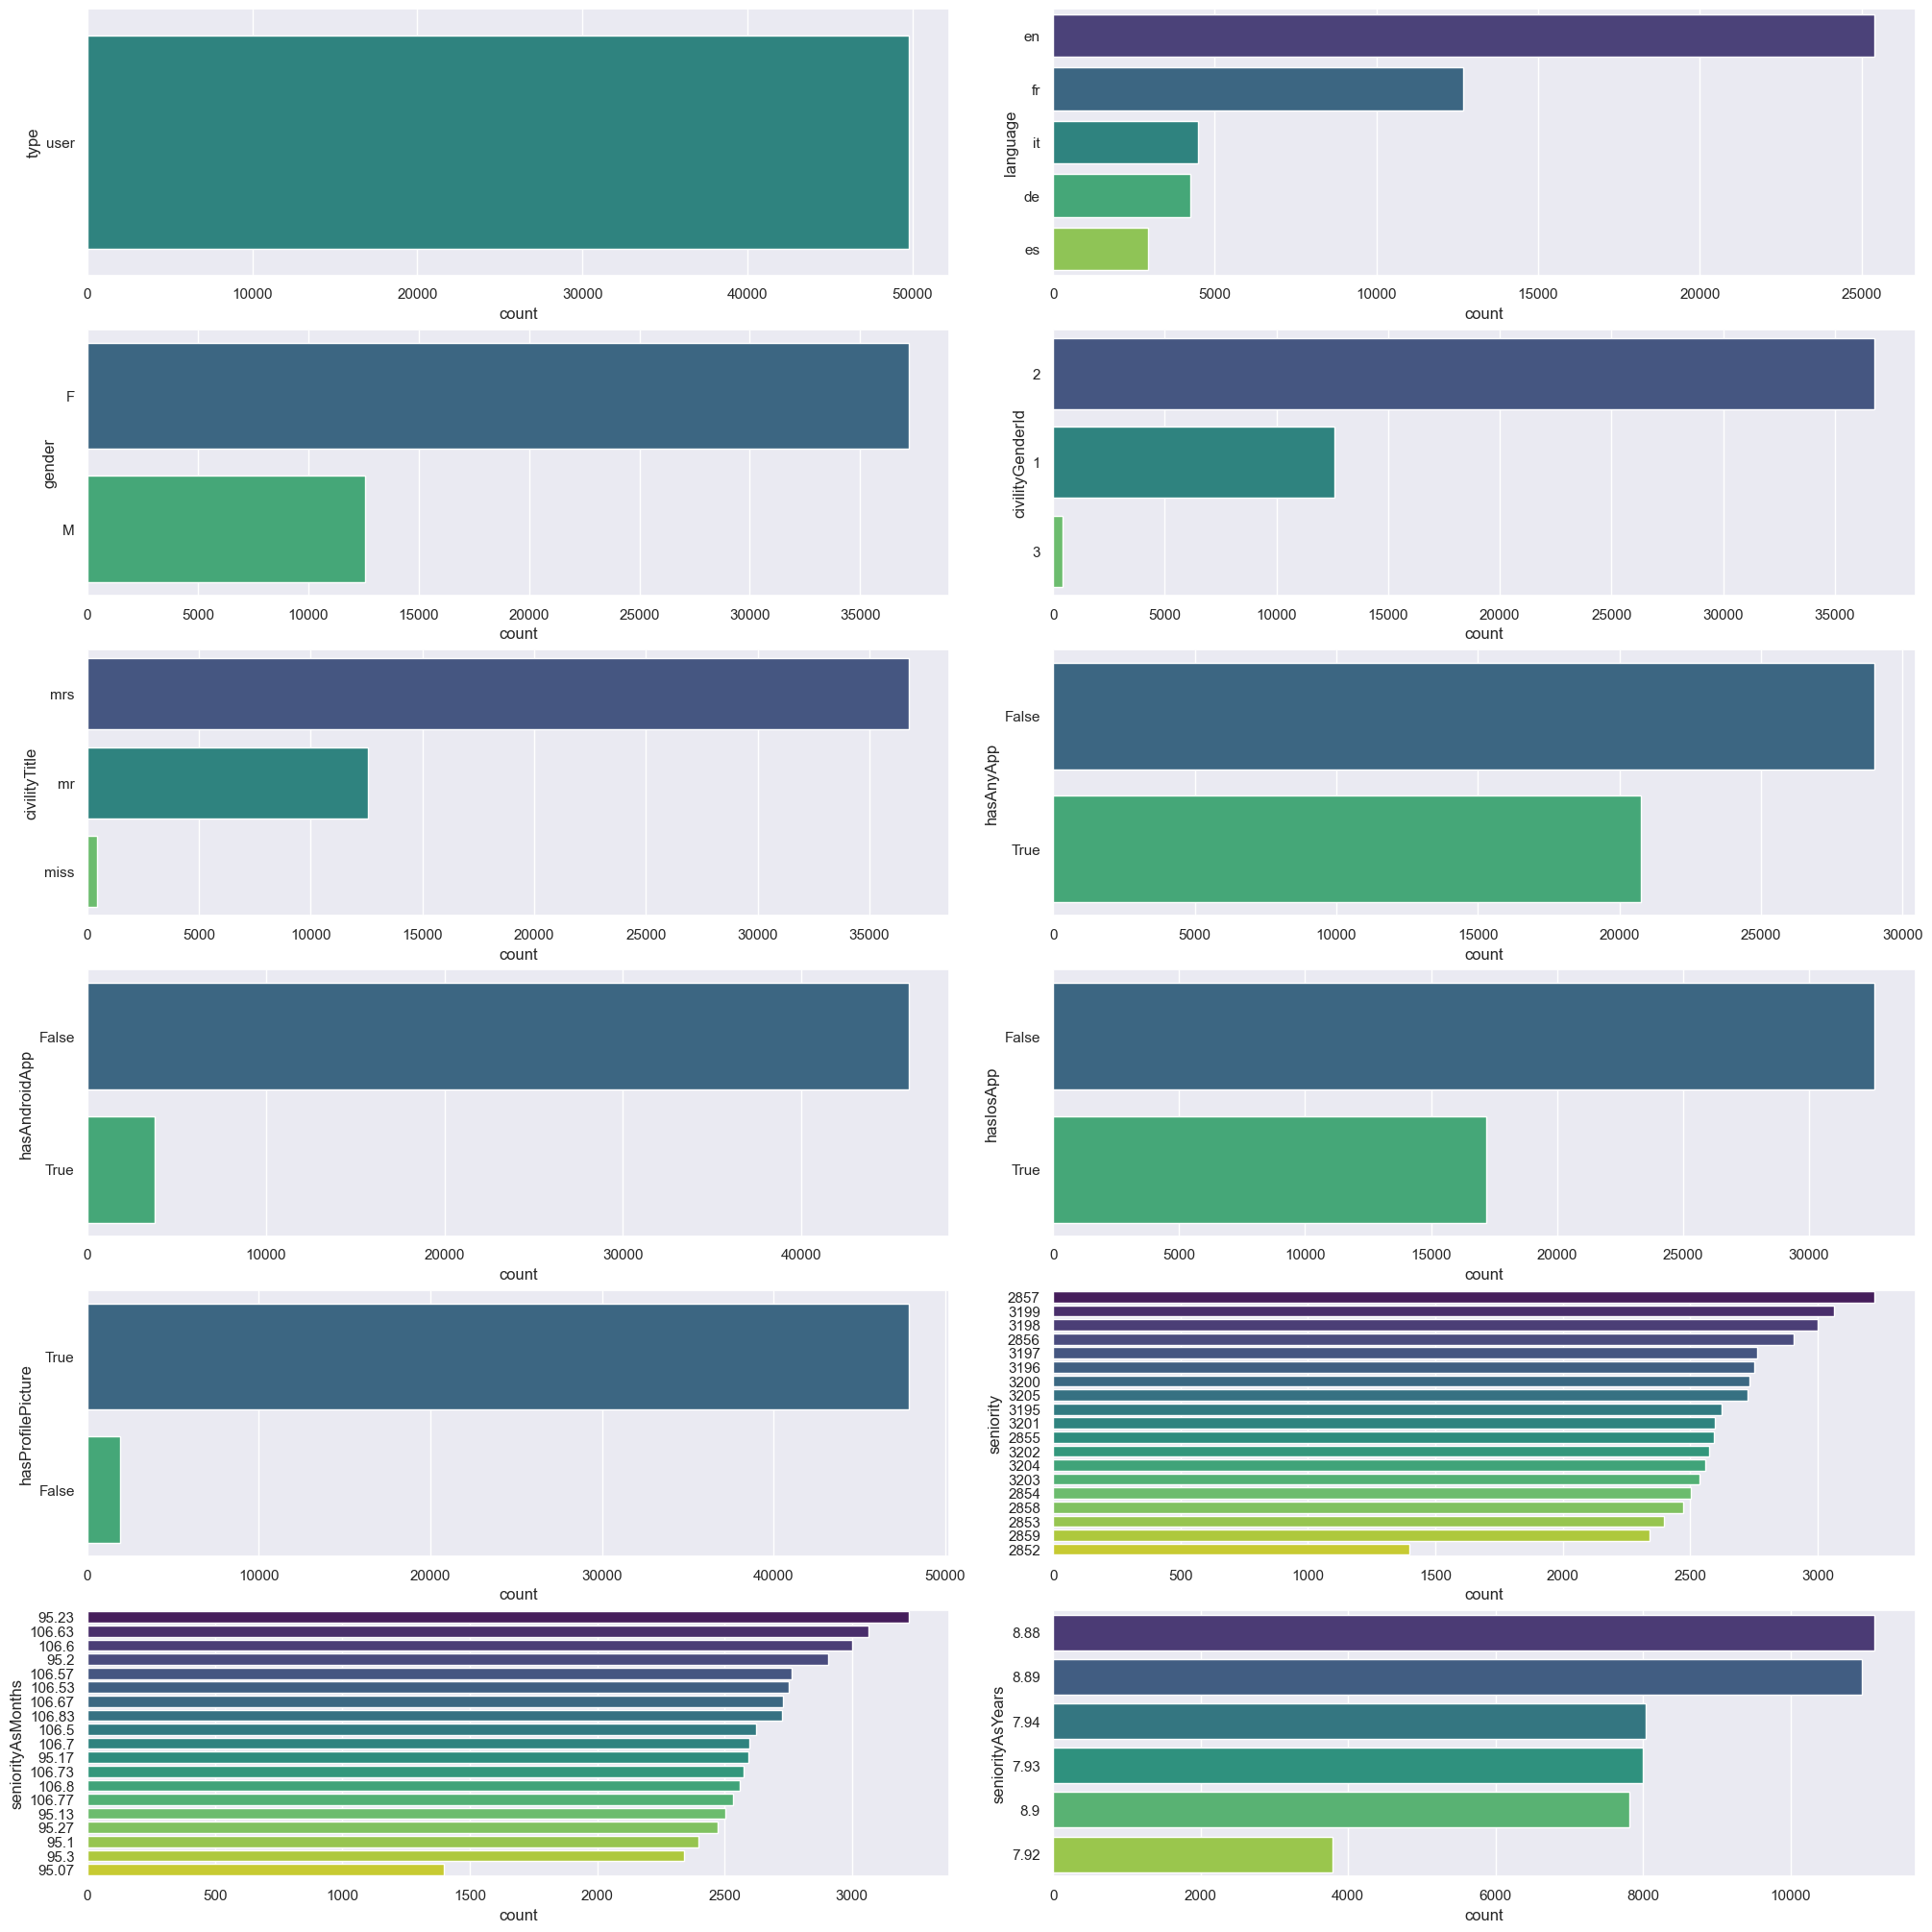

In [97]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20), constrained_layout=True)
categorical = ['type', 'language', 'gender',
               'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
               'hasIosApp', 'hasProfilePicture', 'seniority',
               'seniorityAsMonths', 'seniorityAsYears', ]
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

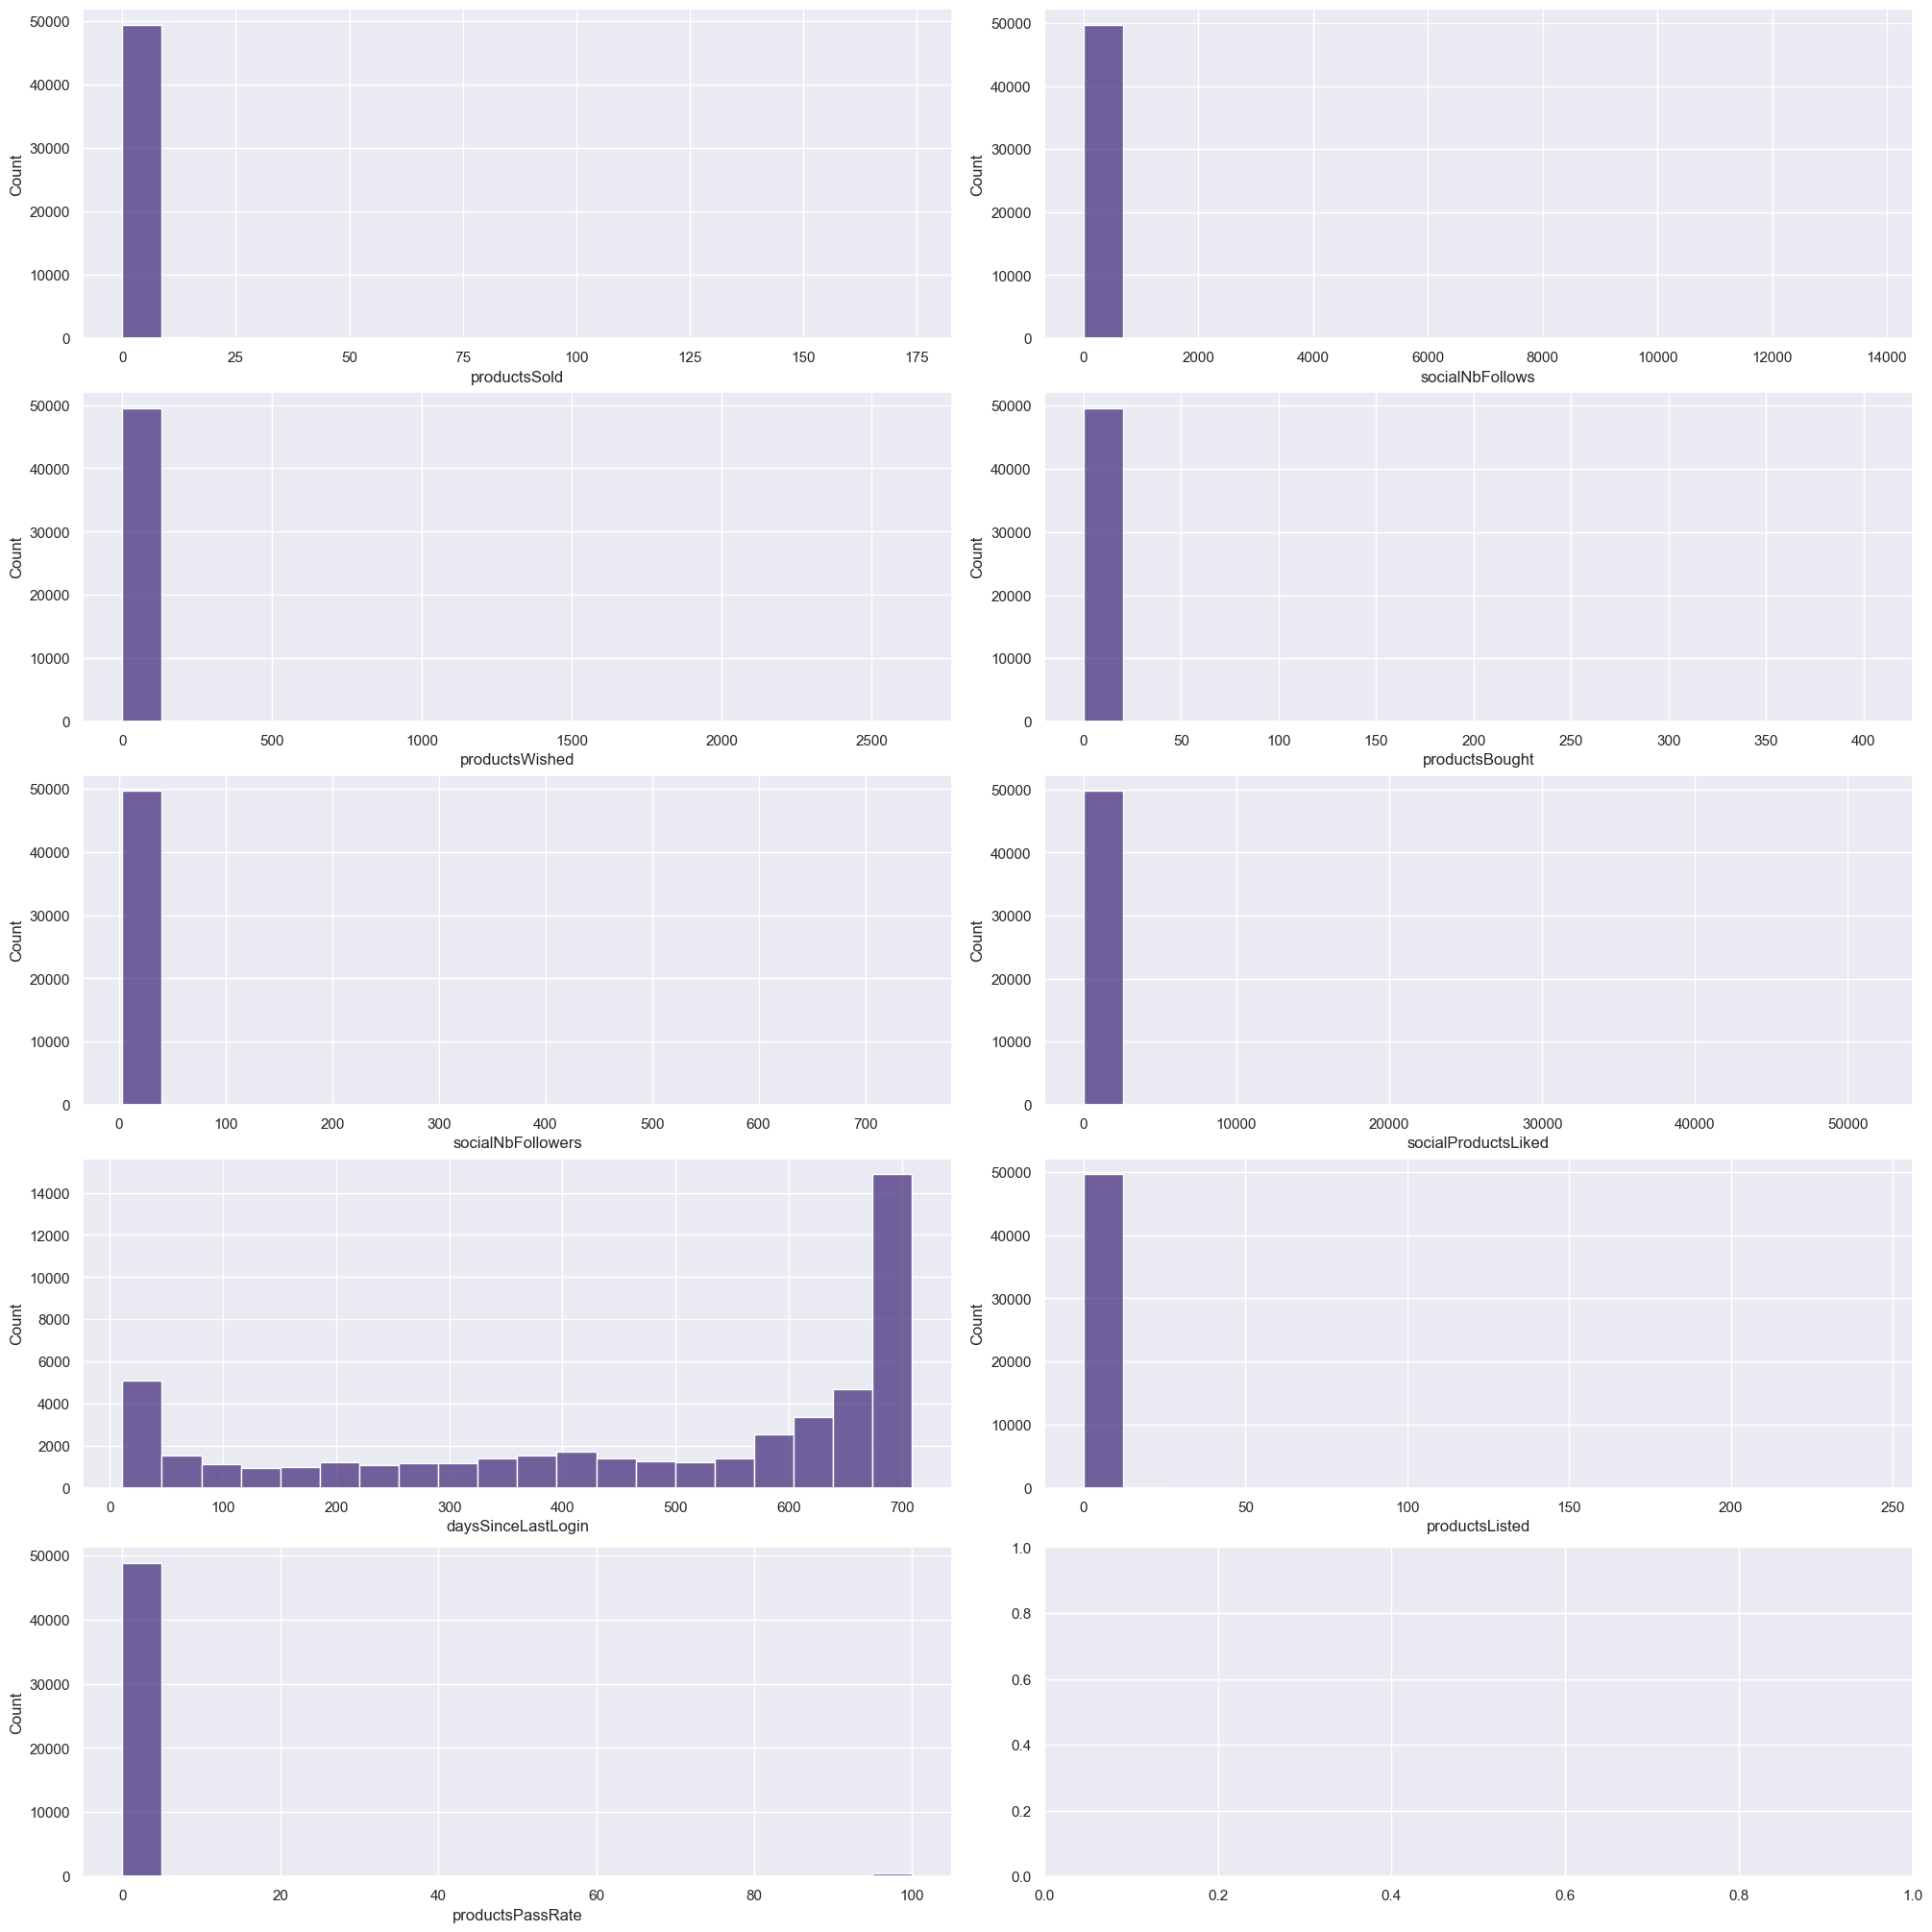

In [98]:
numerical = set(df.columns)-set(categorical)-{'countryCode', 'country'}
fig, axs = plt.subplots(len(numerical)//2+1, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

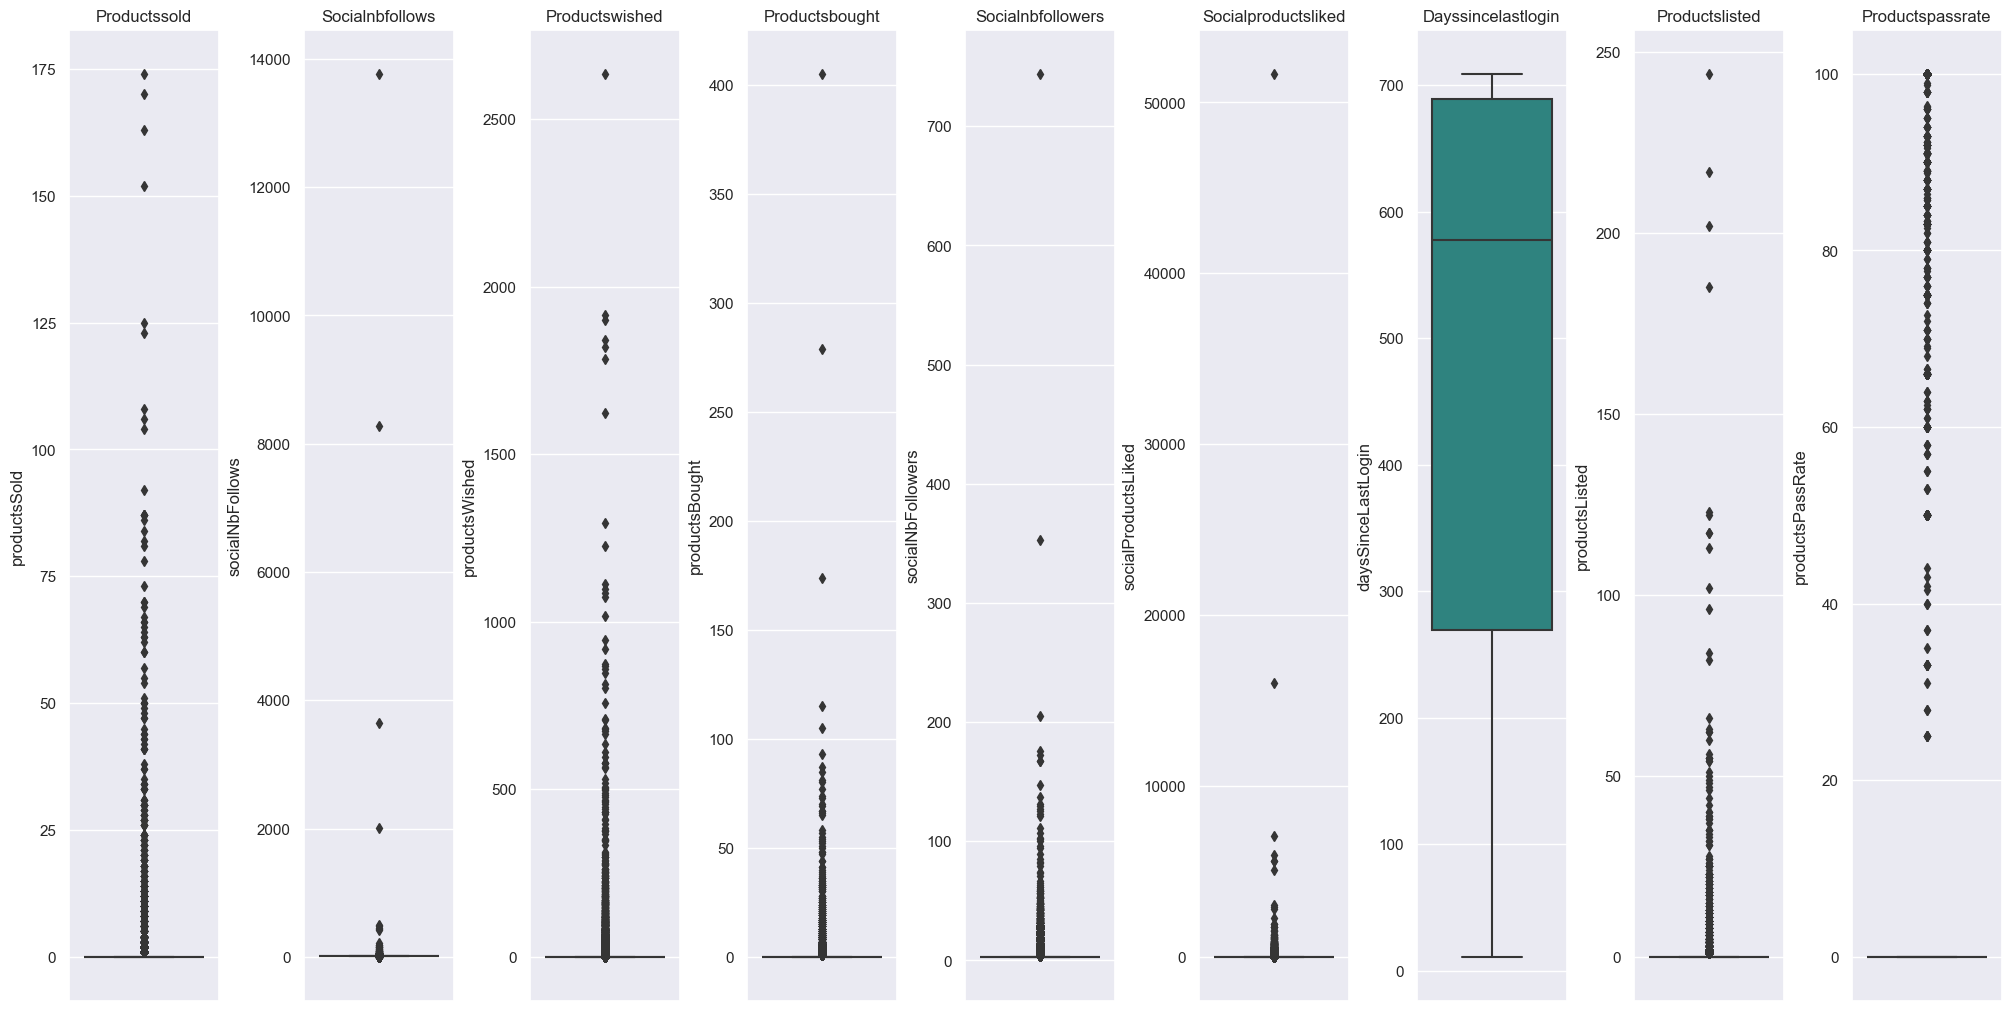

In [99]:
fig, axs = plt.subplots(1, 9,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f,  data=df,  ax=axs[i],
                palette="viridis")
    axs[i].set_title(f.capitalize())


plt.show()

In [101]:
numerical

{'daysSinceLastLogin',
 'productsBought',
 'productsListed',
 'productsPassRate',
 'productsSold',
 'productsWished',
 'socialNbFollowers',
 'socialNbFollows',
 'socialProductsLiked'}

In [102]:
df[df['socialNbFollows'] <= 8].shape

(45936, 23)

In [103]:
df['socialNbFollows'] = df['socialNbFollows'].apply(
    lambda x: 1 if x > 8 else 0)

In [104]:
df[df['socialProductsLiked'] == 0].shape

(34614, 23)

In [105]:
df['socialProductsLiked'] = df['socialProductsLiked'].apply(
    lambda x: 1 if x > 0 else 0)

In [106]:
df[df['productsSold'] == 0].shape

(47724, 23)

In [107]:
df['productsSold'] = df['productsSold'].apply(lambda x: 1 if x > 0 else 0)

In [108]:
df[df['productsWished'] == 0].shape

(40753, 23)

In [109]:
df['productsWished'] = df['productsWished'].apply(lambda x: 1 if x > 0 else 0)

In [110]:
df[df['productsPassRate'] == 0].shape

(48826, 23)

In [111]:
df['productsPassRate'] = df['productsPassRate'].apply(
    lambda x: 1 if x > 0 else 0)

In [112]:
df[df['socialNbFollowers'] == 3].shape

(39059, 23)

In [113]:
df['socialNbFollowers'] = df['socialNbFollowers'].apply(
    lambda x: 1 if x > 3 else 0)

In [114]:
df[df['productsListed'] == 0].shape

(48036, 23)

In [115]:
df['productsListed'] = df['productsListed'].apply(lambda x: 1 if x > 0 else 0)

In [116]:
df[df['productsBought'] == 0].shape

(44428, 23)

In [117]:
df['productsBought'] = df['productsBought'].apply(lambda x: 1 if x > 0 else 0)

In [118]:
df[df['daysSinceLastLogin'] > 350].shape

(34337, 23)

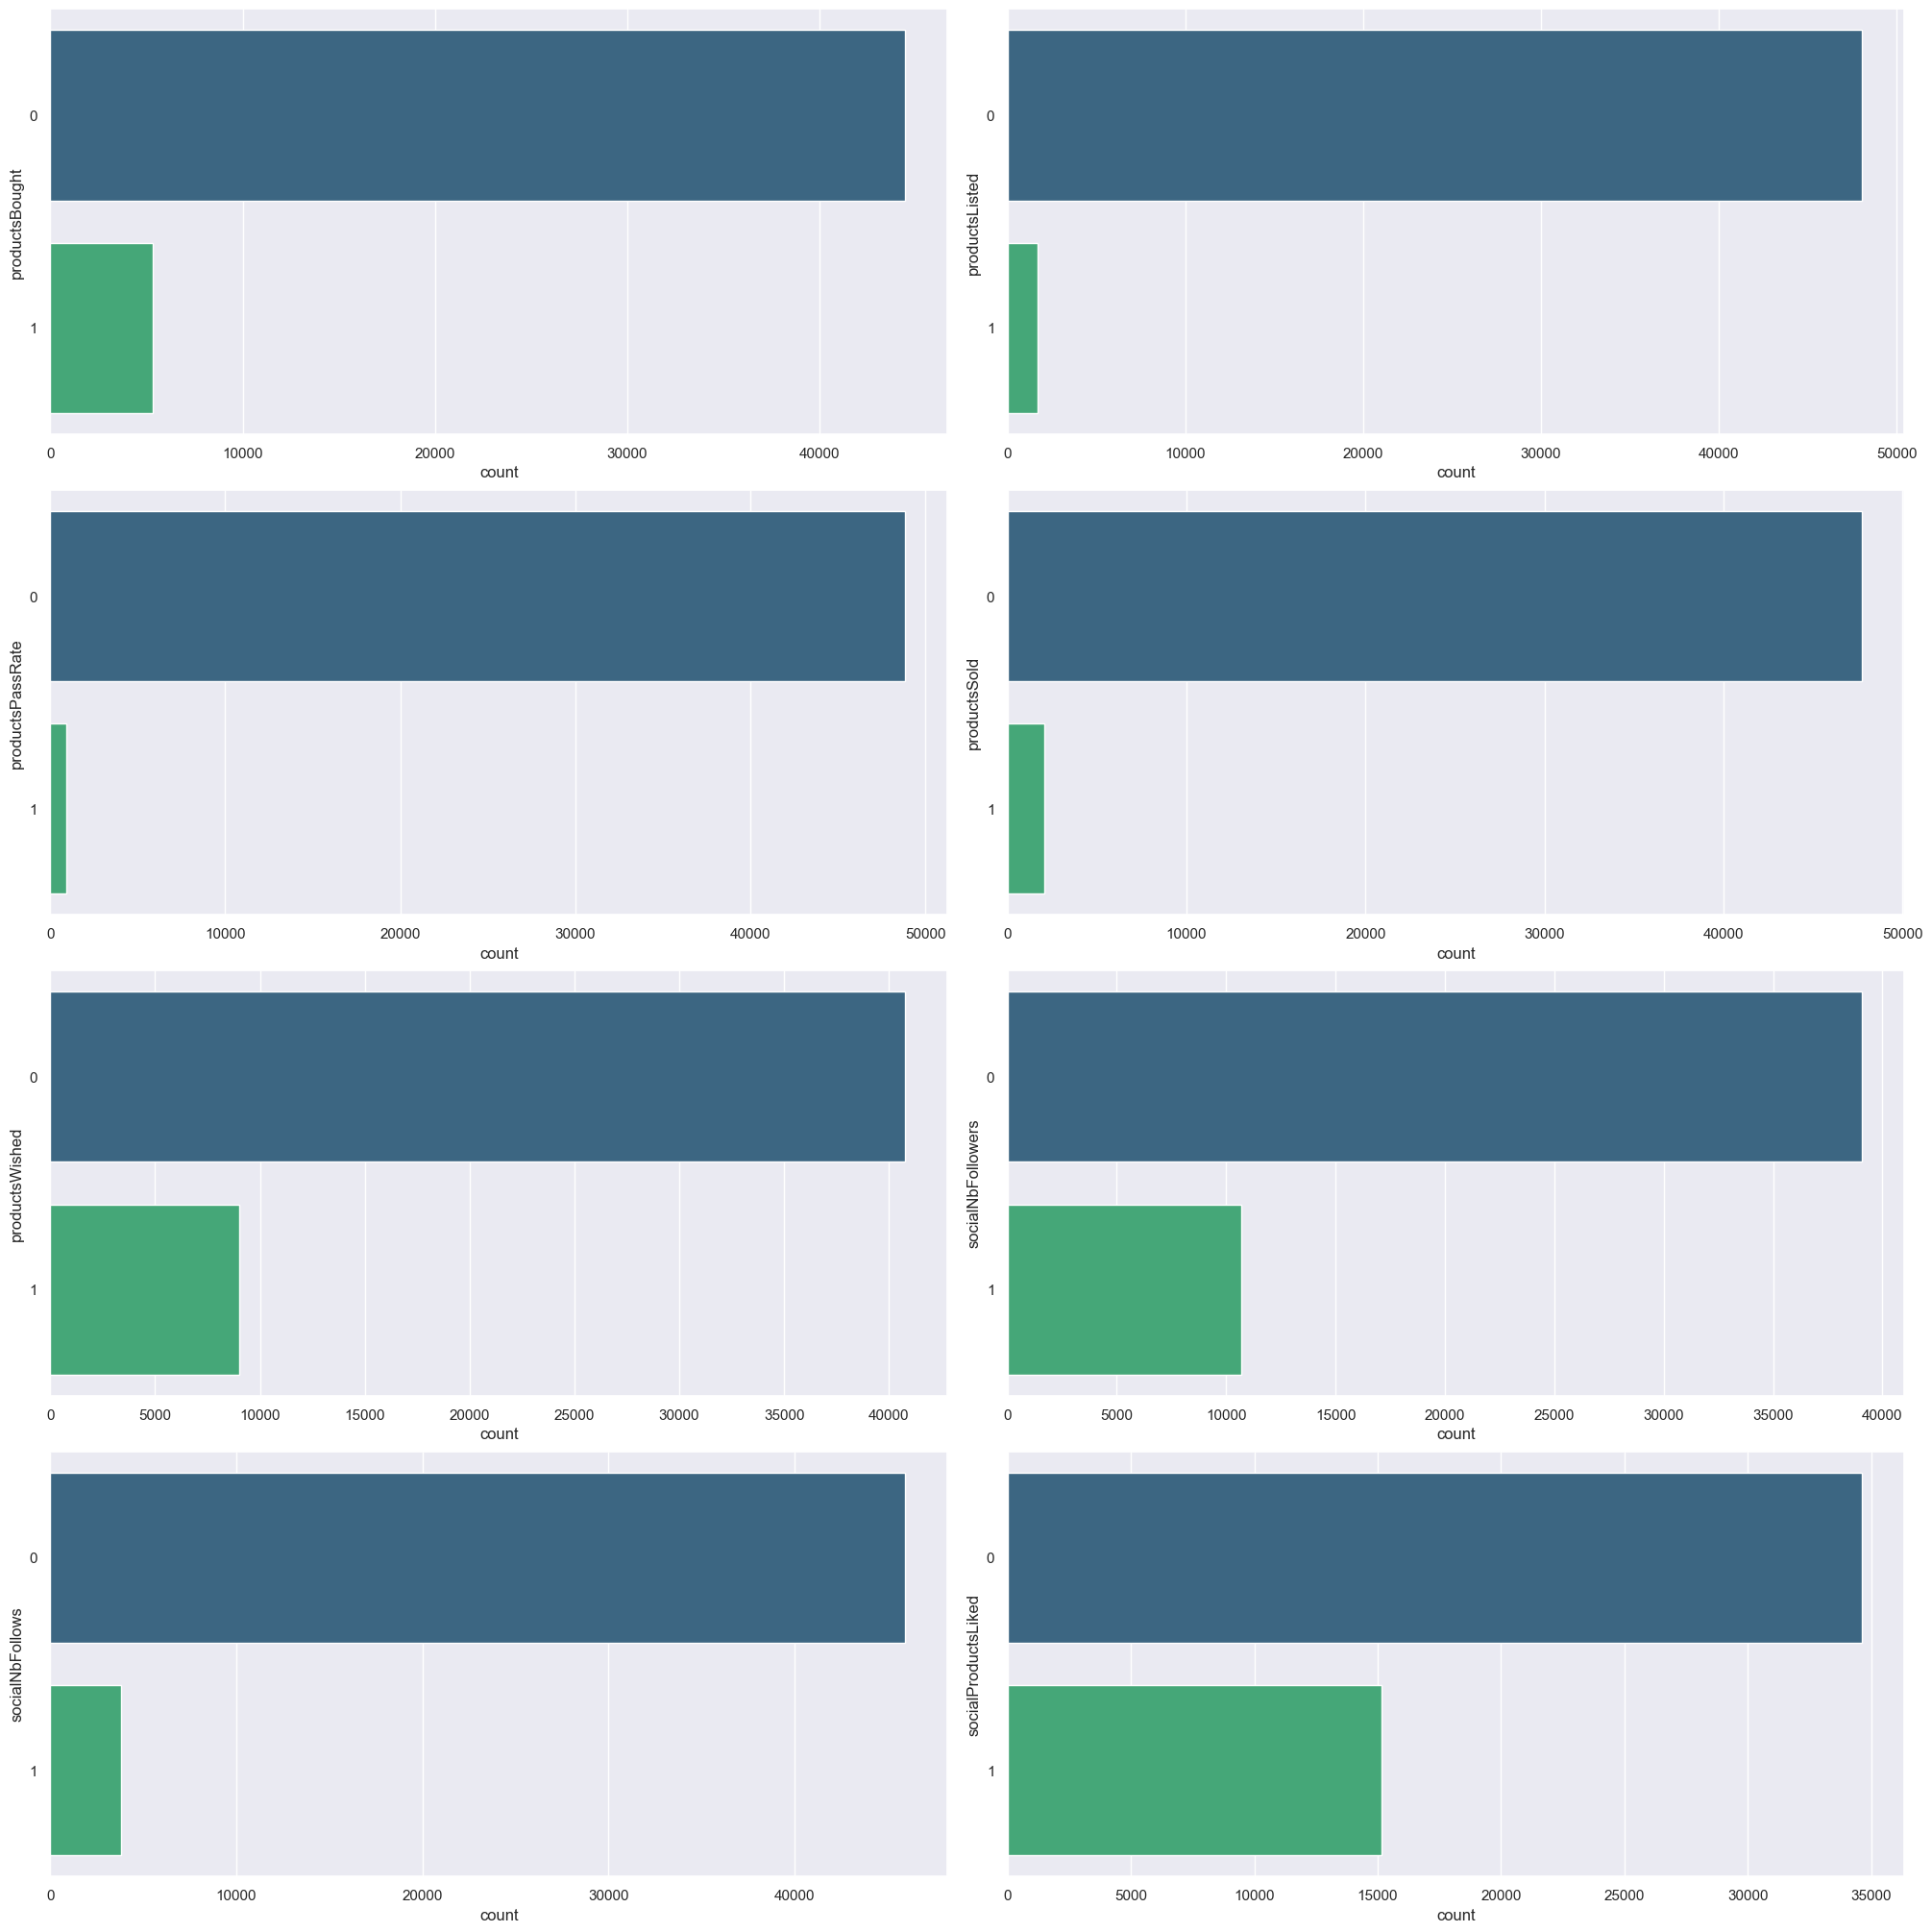

In [119]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout=True)
cols = ['productsBought', 'productsListed', 'productsPassRate',
        'productsSold', 'productsWished', 'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked']
for i, f in enumerate(cols):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

In [120]:
df.head()

,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,user,Royaume-Uni,en,1,1,1,1,1,1,1,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,user,Monaco,en,1,0,1,1,1,1,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,user,France,fr,1,1,1,1,1,1,1,1,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,user,Etats-Unis,en,1,1,1,1,1,1,1,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,user,Etats-Unis,en,1,0,0,1,1,1,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [121]:
df.drop(['type'], axis=1, inplace=True)

In [122]:
df.head()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,Royaume-Uni,en,1,1,1,1,1,1,1,1,M,1,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,Monaco,en,1,0,1,1,1,1,0,0,F,2,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,France,fr,1,1,1,1,1,1,1,1,F,2,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,Etats-Unis,en,1,1,1,1,1,1,1,0,F,2,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,Etats-Unis,en,1,0,0,1,1,1,0,0,F,2,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [123]:
# encode categorical
df["gender"] = df["gender"].map({'M': 0, 'F': 1})

In [124]:
country_count = dict(df['countryCode'].value_counts())
df['countryCode'] = df['countryCode'].map(country_count)

In [125]:
df.head()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,Royaume-Uni,en,1,1,1,1,1,1,1,1,0,1,mr,True,False,True,True,11,3196,106.53,8.88,5454
1,Monaco,en,1,0,1,1,1,1,0,0,1,2,mrs,True,False,True,True,12,3204,106.80,8.90,34
2,France,fr,1,1,1,1,1,1,1,1,1,2,mrs,True,False,True,False,11,3203,106.77,8.90,11145
3,Etats-Unis,en,1,1,1,1,1,1,1,0,1,2,mrs,True,False,True,False,12,3198,106.60,8.88,7459
4,Etats-Unis,en,1,0,0,1,1,1,0,0,1,2,mrs,False,False,False,True,22,2854,95.13,7.93,7459


In [126]:
country_count = dict(df['country'].value_counts())
df['country'] = df['country'].map(country_count)

In [127]:
df = pd.get_dummies(df, columns=['language', 'civilityTitle'])

In [128]:
df.head()

,country,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,language_de,language_en,language_es,language_fr,language_it,civilityTitle_miss,civilityTitle_mr,civilityTitle_mrs
0,5454,1,1,1,1,1,1,1,1,0,1,True,False,True,True,11,3196,106.53,8.88,5454,False,True,False,False,False,False,True,False
1,34,1,0,1,1,1,1,0,0,1,2,True,False,True,True,12,3204,106.80,8.90,34,False,True,False,False,False,False,False,True
2,11145,1,1,1,1,1,1,1,1,1,2,True,False,True,False,11,3203,106.77,8.90,11145,False,False,False,True,False,False,False,True
3,7459,1,1,1,1,1,1,1,0,1,2,True,False,True,False,12,3198,106.60,8.88,7459,False,True,False,False,False,False,False,True
4,7459,1,0,0,1,1,1,0,0,1,2,False,False,False,True,22,2854,95.13,7.93,7459,False,True,False,False,False,False,False,True


<Axes: >

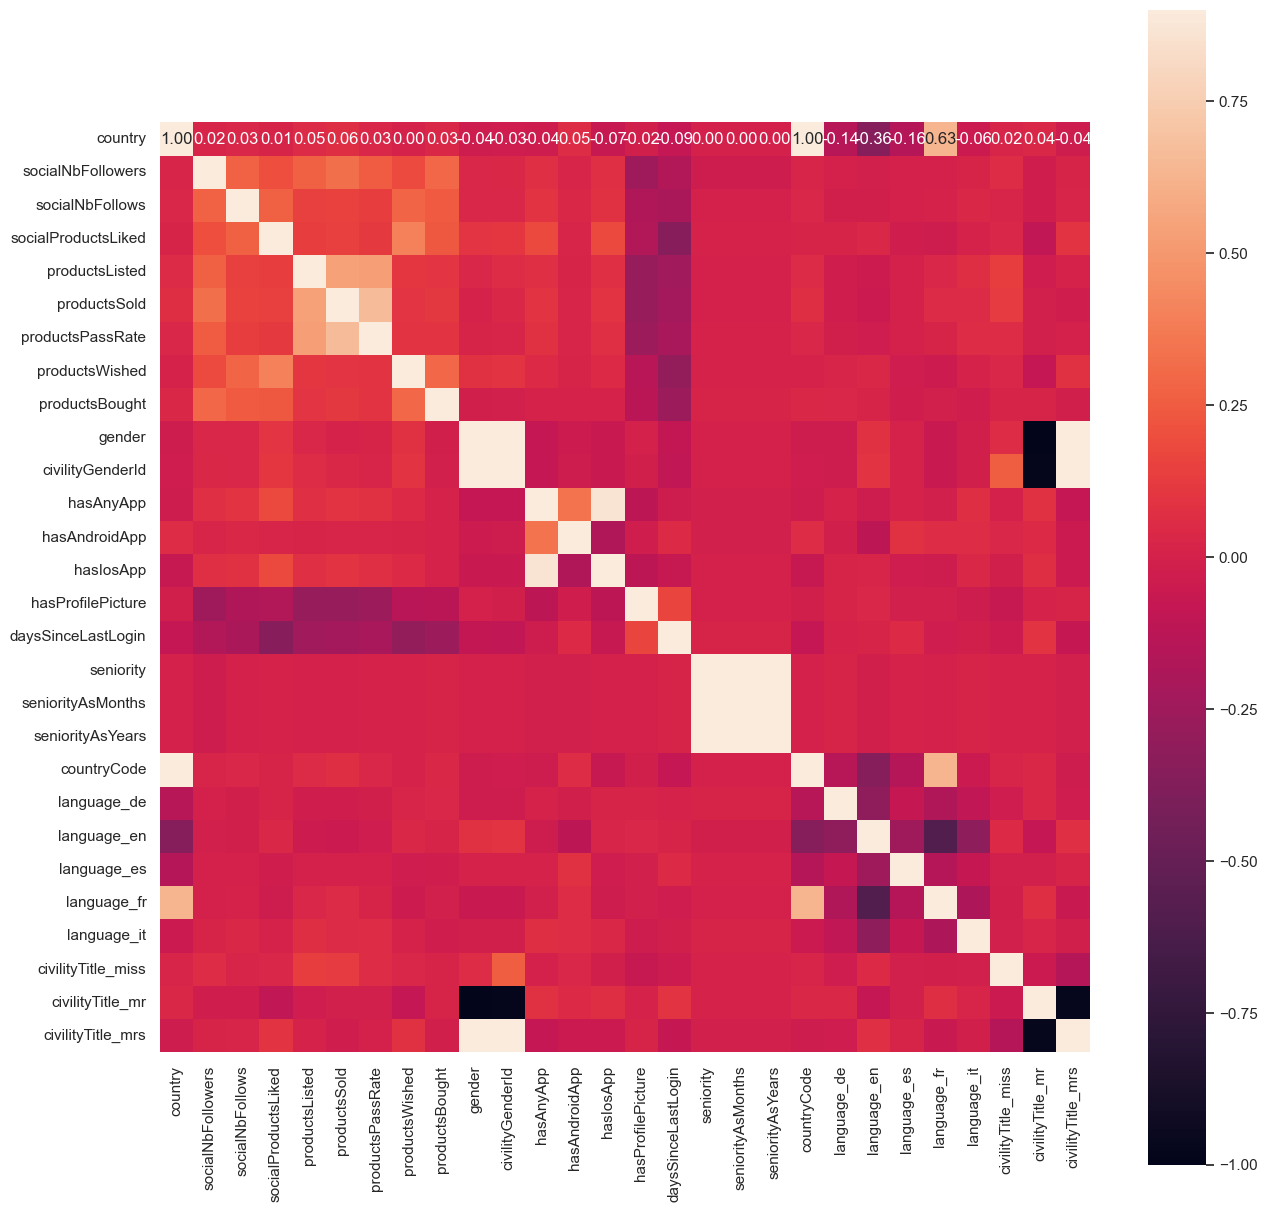

In [129]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

In [130]:
# drop highly correlated features
df.drop(['civilityTitle_miss', 'civilityTitle_mr', 'civilityTitle_mrs', 'civilityGenderId',
         'seniorityAsMonths', 'seniorityAsYears', 'country'], axis=1, inplace=True)

<Axes: >

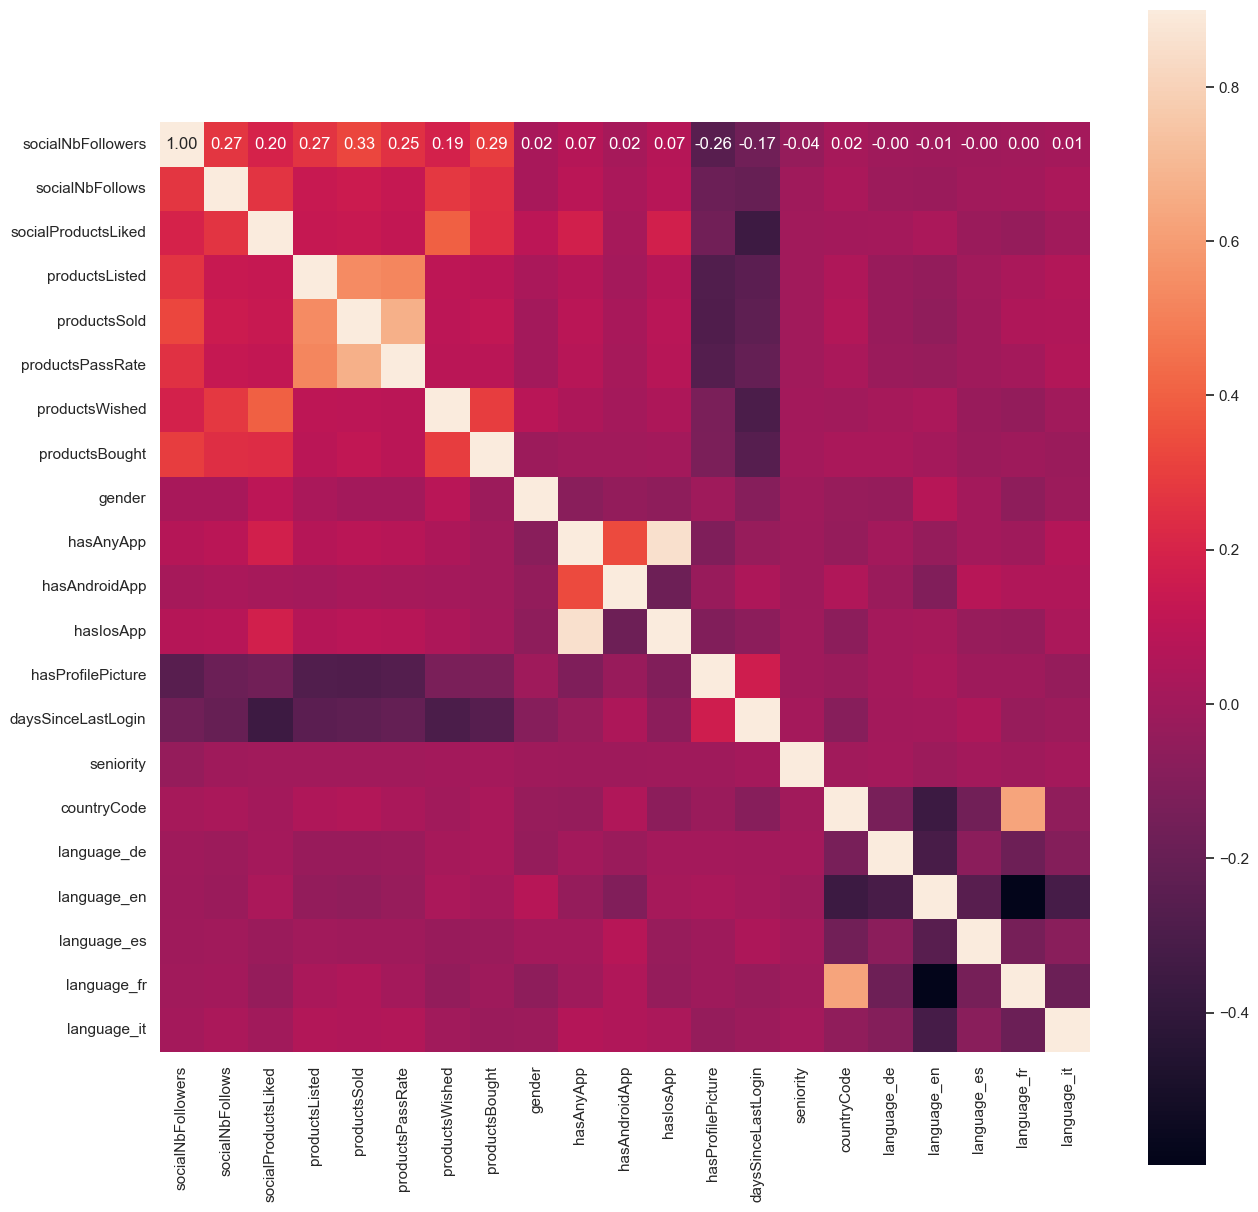

In [131]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

In [132]:
scaler = MinMaxScaler((-1, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode,language_de,language_en,language_es,language_fr,language_it
count,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000,49760.000000
mean,-0.569895,-0.846302,-0.391238,-0.930707,-0.918167,-0.962460,-0.637982,-0.785691,0.494695,-0.165555,-0.848834,-0.309807,0.924156,0.306102,0.193923,-0.051850,-0.828859,0.020740,-0.881551,-0.489952,-0.820378
std,0.821725,0.532708,0.920299,0.365768,0.396197,0.271427,0.770059,0.618625,0.869076,0.986211,0.528664,0.950809,0.382019,0.698404,0.954915,0.700701,0.559464,0.999795,0.472093,0.871758,0.571828
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-0.260745,-0.971671,-0.770818,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.624642,0.949008,-0.169598,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,0.942693,0.977337,0.338478,-1.000000,1.000000,-1.000000,1.000000,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = clf.fit_predict(df)
df = df[y_pred == 1]

df.shape

(47272, 21)

In [134]:
df.head()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode,language_de,language_en,language_es,language_fr,language_it
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.000000,0.949008,-0.021357,-1.0,1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-0.997135,0.994334,-0.994078,-1.0,1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.000000,0.988669,1.000000,-1.0,-1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-0.997135,0.960340,0.338478,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-0.968481,-0.988669,0.338478,-1.0,1.0,-1.0,-1.0,-1.0


2 3 4 5 6 7 8 9 10 11 

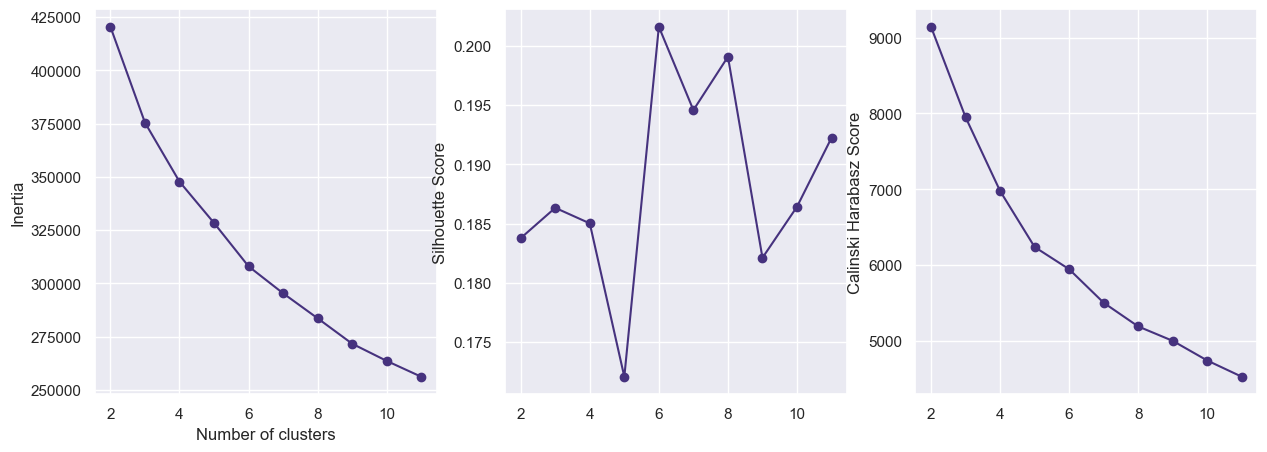

In [135]:
k_range = range(2, 12)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(
        df, kmeans.labels_, sample_size=10000))
    calinski.append(metrics.calinski_harabasz_score(df, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

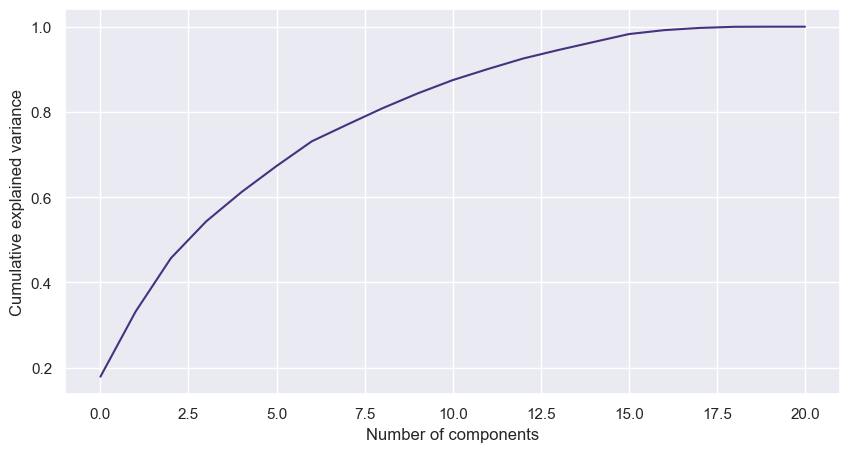

In [167]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

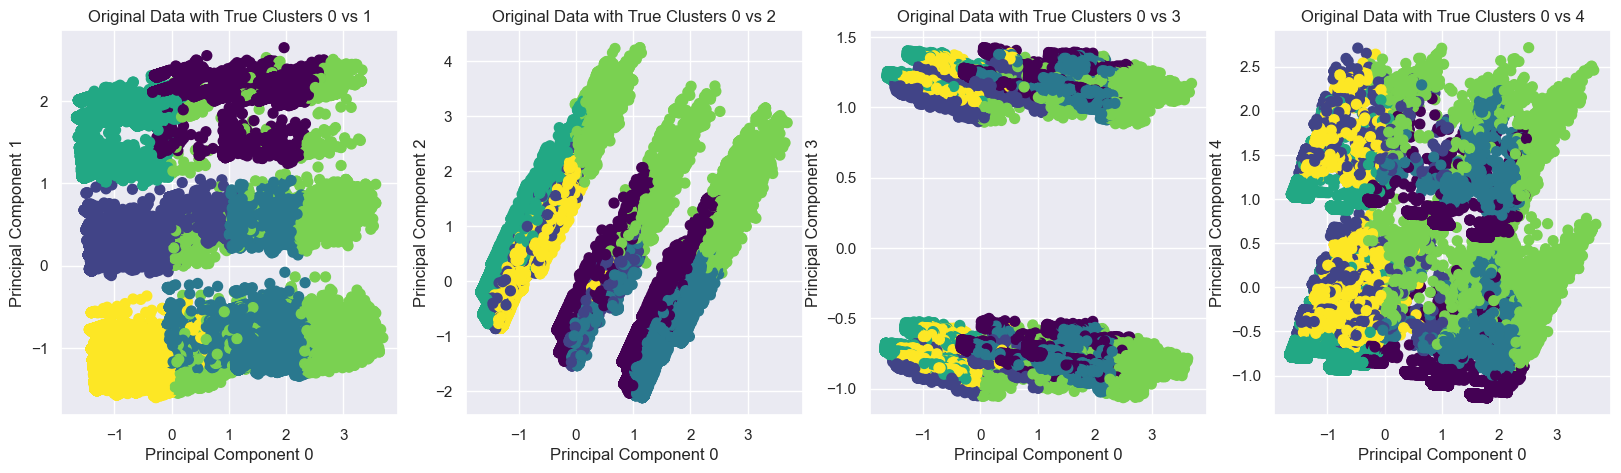

In [149]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# Apply KMeans clustering
NUM_CLUSTERS = 6
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the original data with cluster assignments
plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

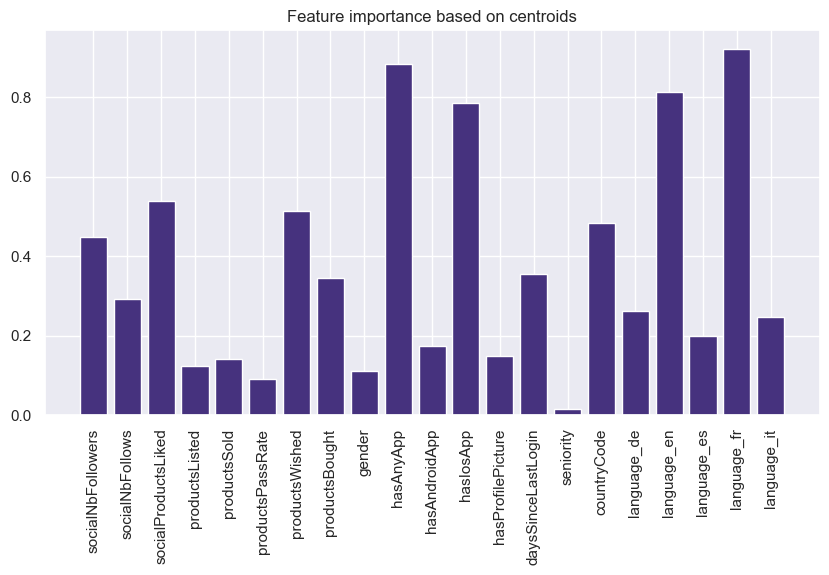

In [150]:
centroids = kmeans.cluster_centers_

# Feature importance based on centroid differences
feature_importance = centroids.std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [151]:
important_columns = df.columns[feature_importance > 0.25]
important_columns

Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsWished', 'productsBought', 'hasAnyApp', 'hasIosApp',
       'daysSinceLastLogin', 'countryCode', 'language_de', 'language_en',
       'language_fr'],
      dtype='object')

In [152]:

cluster_data = np.array(
    [df[clusters == i][important_columns].mean(axis=0) for i in range(NUM_CLUSTERS)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(NUM_CLUSTERS), index=important_columns)
if 'socialNbFollowers' in cluster_data.index:
    cluster_data.loc['active'] = cluster_data.loc['socialNbFollowers']+cluster_data.loc['socialNbFollows'] + \
        cluster_data.loc['socialProductsLiked']+cluster_data.loc['productsWished'] + \
        cluster_data.loc['productsBought']
cluster_data

,0,1,2,3,4,5
socialNbFollowers,-0.586500,-0.707442,-0.763252,-0.652087,0.508992,-0.704824
socialNbFollows,-0.881538,-0.947621,-0.963026,-0.902768,-0.149323,-0.941621
socialProductsLiked,-0.353599,-0.606835,-0.421996,-0.610211,0.904223,-0.594776
productsWished,-0.785427,-0.766209,-0.867384,-0.744730,0.596686,-0.732800
productsBought,-0.911489,-0.867454,-0.957932,-0.823032,0.037381,-0.859834
hasAnyApp,1.000000,-0.710316,1.000000,-1.000000,0.439079,-0.996574
hasIosApp,0.510952,-1.000000,0.860215,-1.000000,0.209537,-1.000000
daysSinceLastLogin,0.307240,0.436514,0.475642,0.296882,-0.558851,0.393879
countryCode,0.764380,-0.334864,-0.385892,0.675013,-0.207189,-0.253464
language_de,-1.000000,-0.259342,-0.783060,-1.000000,-0.803597,-1.000000


Interpretacija rezultata:
- **AKTIVNI KORISNICI** (klaster 4):
    - skoro su bili ulogovani
    - imaju generalno veci broj pratilaca i pracenih
    - uglavnom su lajkovali, wishlistovali i kupovali proizvode
    - jezici koje govore su raznovrsni ali je engleski najcesci
- **NEAKTIVNI KORISNICI** (ostali klasteri):
    - nemaju dovoljno aktivnosti u prodavnici
    - ...


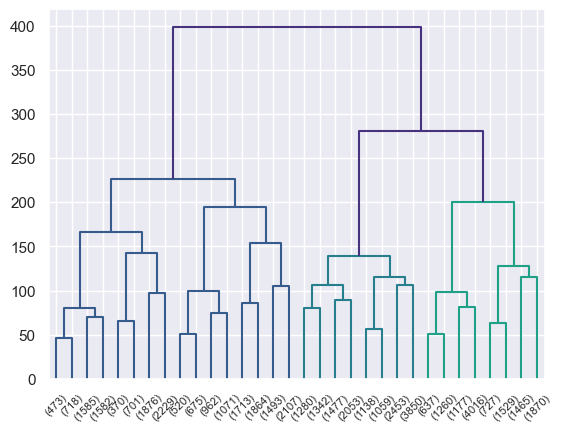

In [153]:
X = df.values
dendrogram = sch.dendrogram(sch.linkage(
    X, method='ward'), truncate_mode='level', p=4)

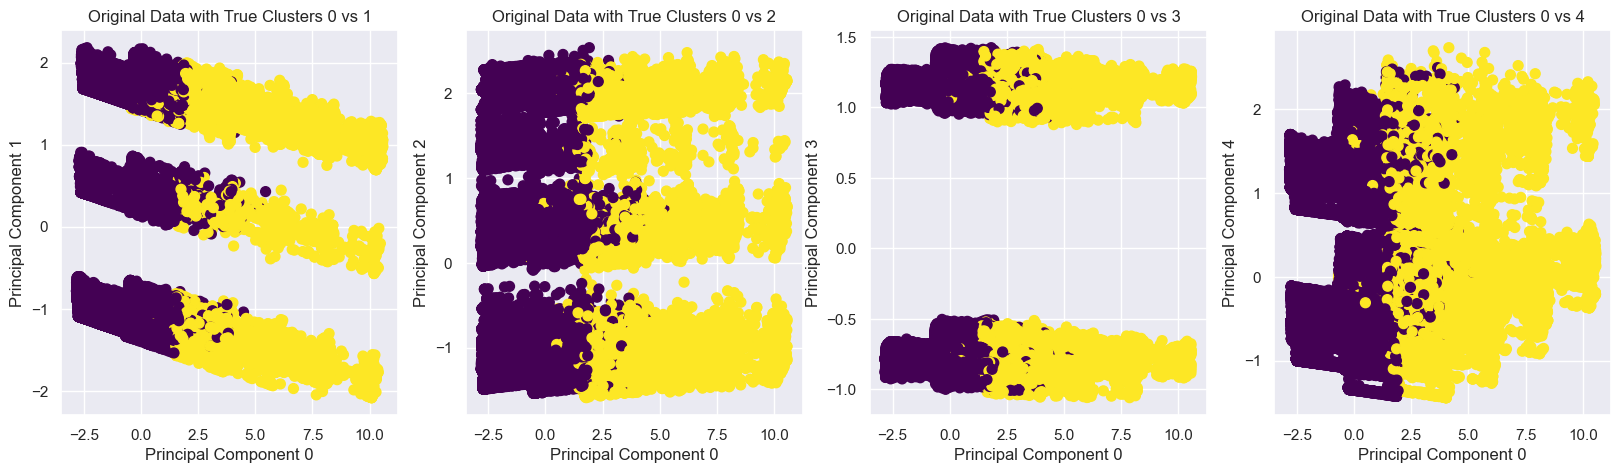

In [114]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(df)


plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

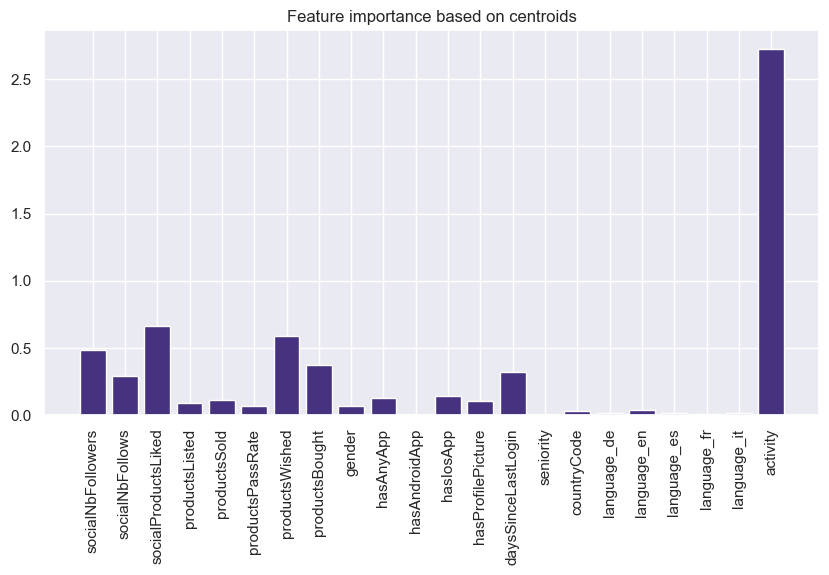

In [128]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]
cluster_4 = df[agg_clustering.labels_ == 3]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)
cluster_4_center = cluster_4.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [133]:
important_columns = df.columns[feature_importance > 0.2]
important_columns

Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsWished', 'productsBought', 'daysSinceLastLogin', 'activity'],
      dtype='object')

In [134]:
clusters = np.array([
    cluster_1[important_columns].mean(axis=0),
    cluster_2[important_columns].mean(axis=0)])

cluster_data = pd.DataFrame(
    clusters.T, columns=[0, 1], index=important_columns)
cluster_data

,0,1
socialNbFollowers,-0.777744,0.188306
socialNbFollows,-0.972090,-0.387446
socialProductsLiked,-0.677267,0.652158
productsWished,-0.892713,0.291239
productsBought,-0.946177,-0.200262
daysSinceLastLogin,0.444533,-0.198871
activity,-4.710523,0.742865


Interpretacija klastera:
- **1**: NISU aktivni korisnici
- **2**: AKTIVNI korisnici

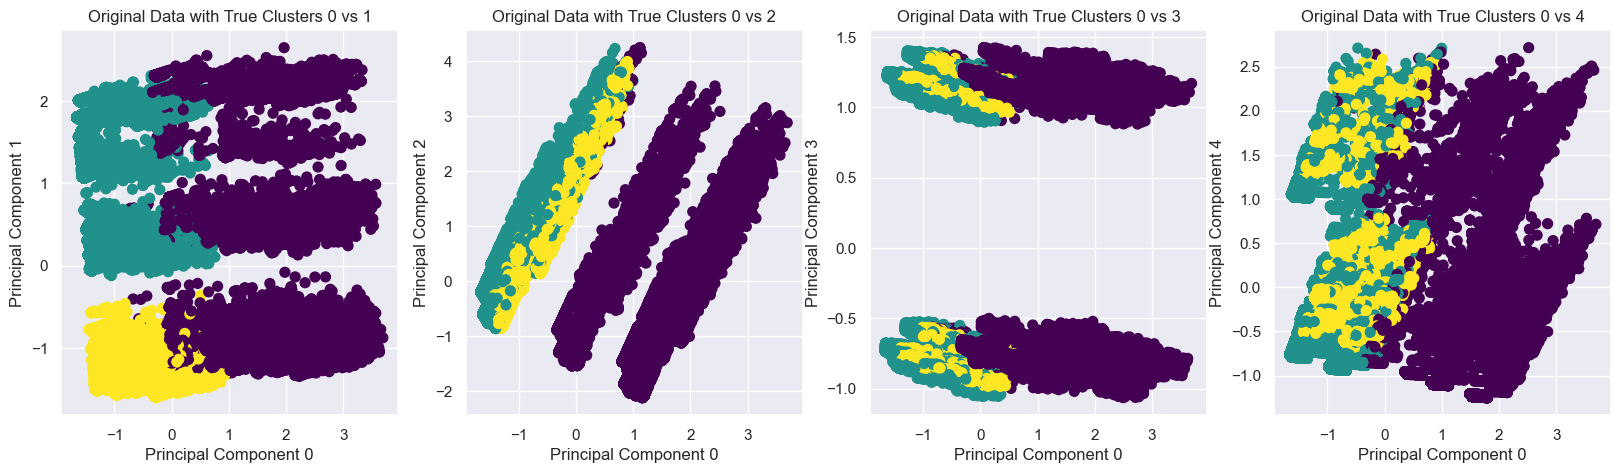

In [154]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(df)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

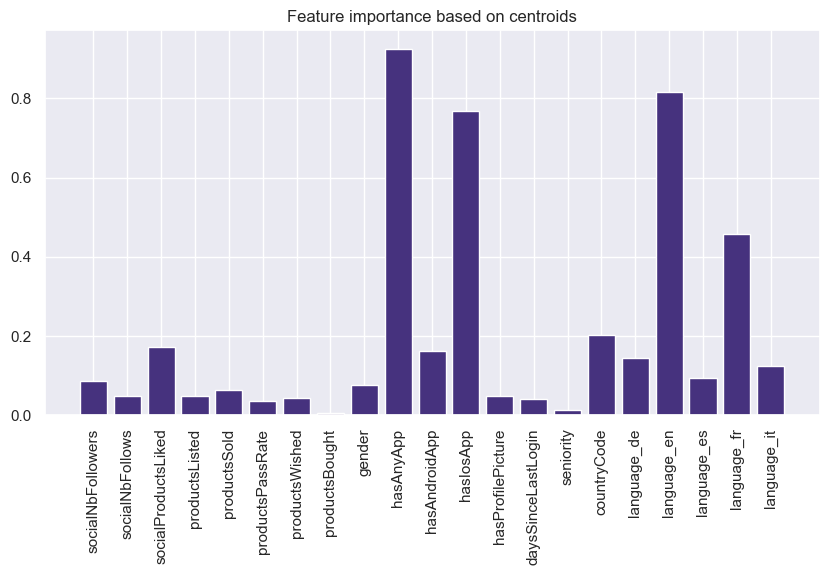

In [155]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]


cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)


# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center, cluster_3_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [157]:
important_columns = df.columns[feature_importance > 0.2]
cluster_data = np.array(
    [df[labels == i][important_columns].mean(axis=0) for i in range(3)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(3), index=important_columns)
if 'socialNbFollowers' in cluster_data.index:
    cluster_data.loc['active'] = cluster_data.loc['socialNbFollowers']+cluster_data.loc['socialNbFollows'] + \
        cluster_data.loc['socialProductsLiked']+cluster_data.loc['productsWished'] + \
        cluster_data.loc['productsBought']
cluster_data

,0,1,2
hasAnyApp,0.962786,-1.000000,-1.000000
hasIosApp,0.628367,-1.000000,-1.000000
countryCode,-0.090192,0.229956,-0.256353
language_en,0.009780,-1.000000,1.000000
language_fr,-0.514118,0.118208,-1.000000


Interpretacija rezultata:
- **0**: imaju aplikaciju
- **1 i 2**: nemaju aplikaciju:
    - **1**: ne govore engleski
    - **2**: govore engleski

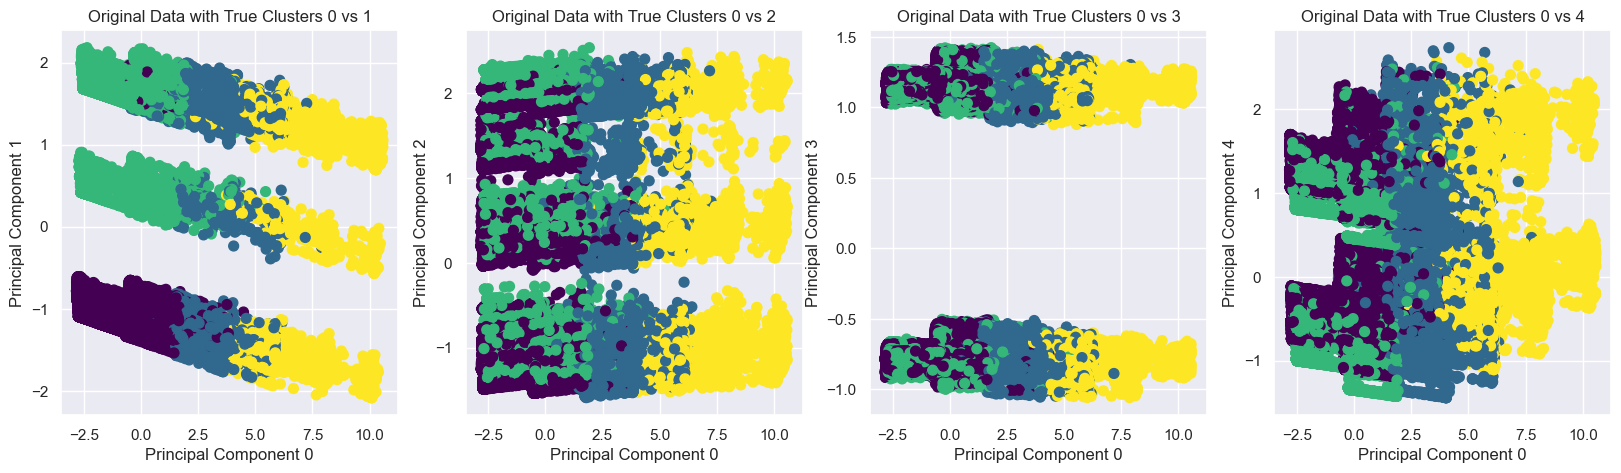

In [136]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(df)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

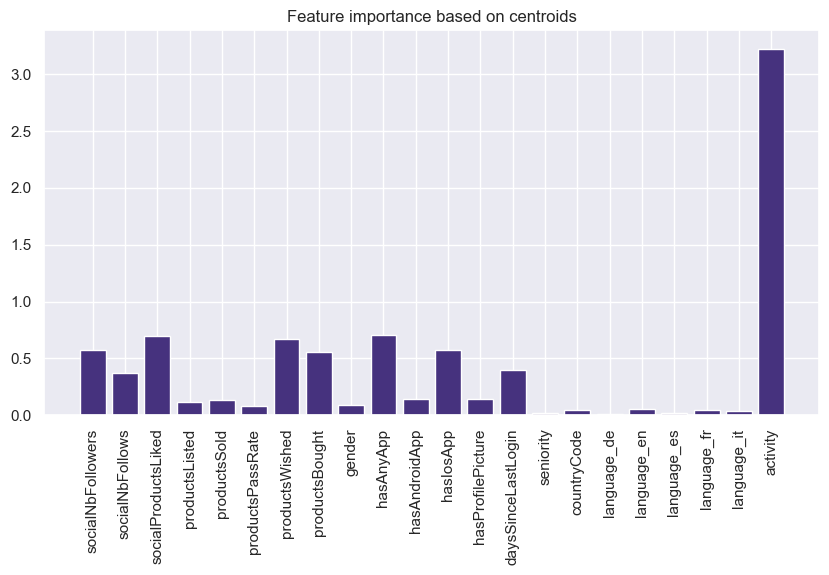

In [139]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]
cluster_4 = df[agg_clustering.labels_ == 3]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)
cluster_4_center = cluster_4.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center, cluster_3_center, cluster_4_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

589


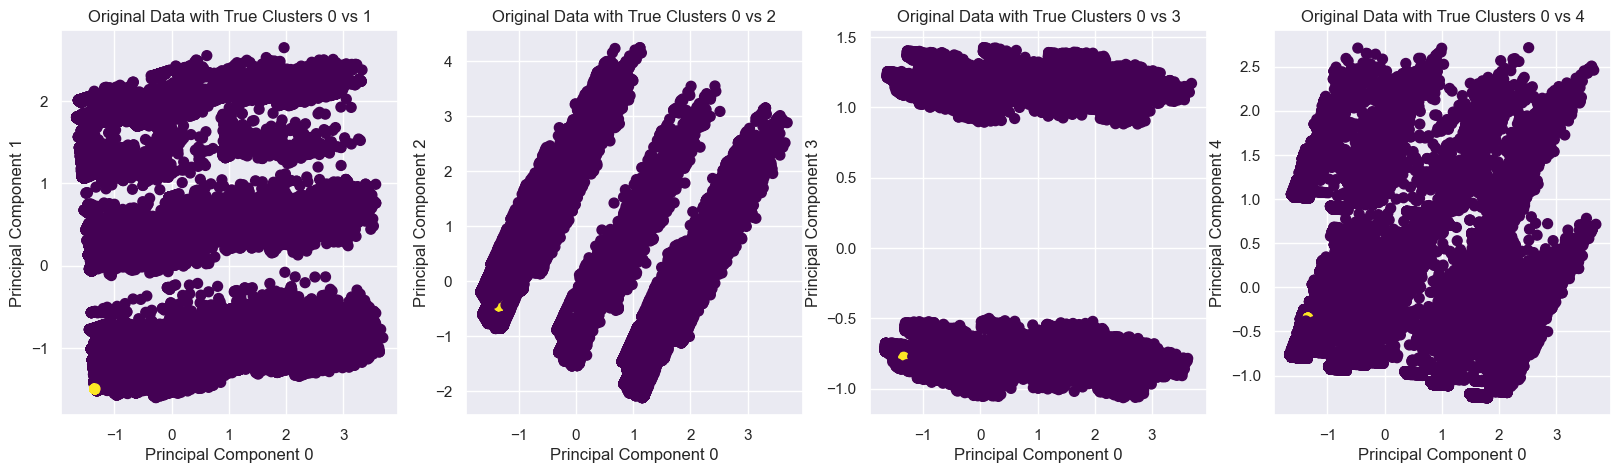

In [158]:
dbscan = DBSCAN(eps=0.05, min_samples=500)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [141]:
print(np.unique(y_dbscan).shape)

(2,)


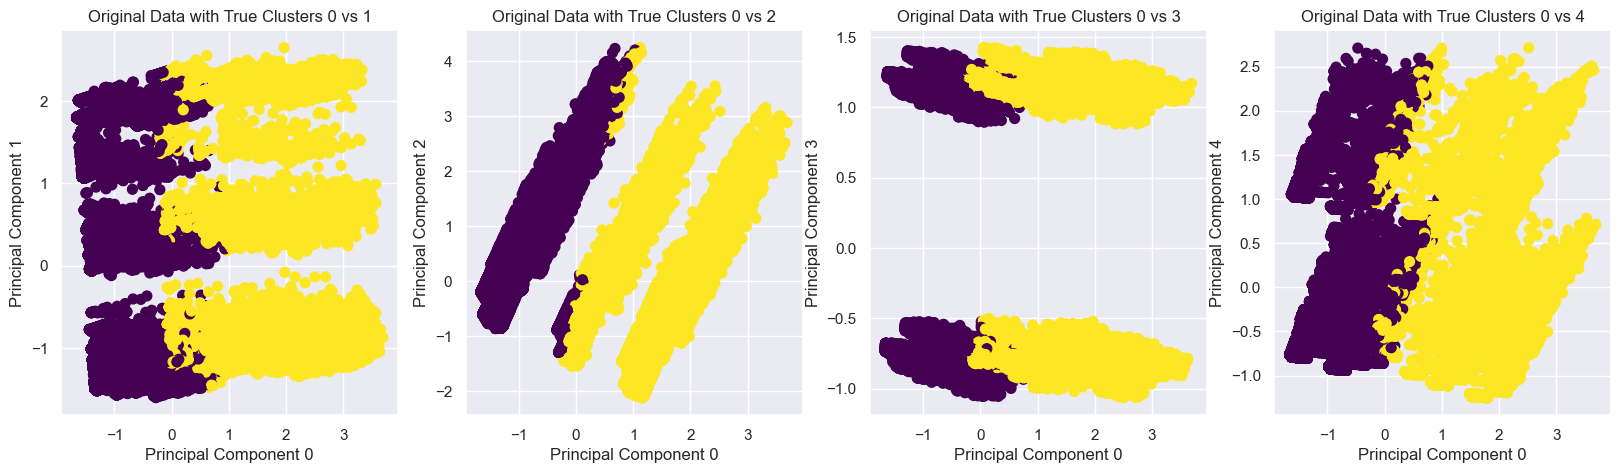

In [162]:
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df.T, 2, 2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=cluster_membership,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

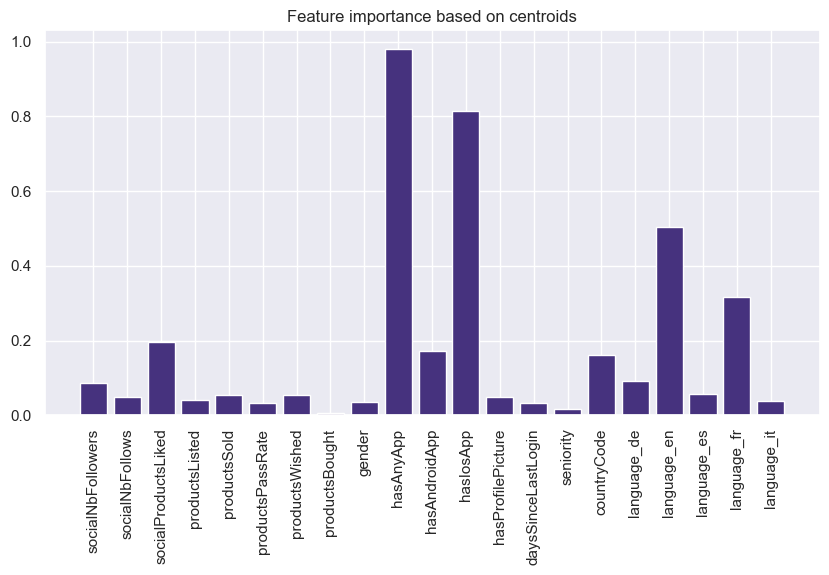

In [170]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [166]:
spectral = cluster.SpectralClustering(
    n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors")

spectral.fit(df)

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=3)

In [168]:

y_spectral = spectral.labels_
y_spectral

array([0, 0, 0, ..., 0, 0, 0])

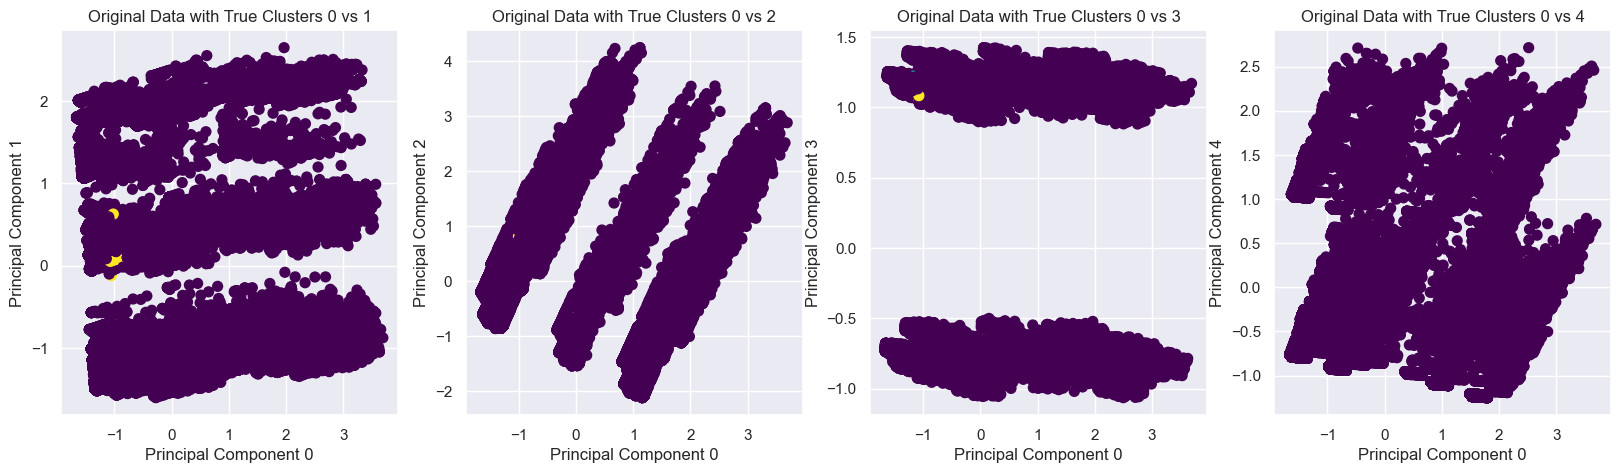

In [169]:

plt.figure(figsize=(20, 5))
plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_spectral,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')